# Newton's Method
## Algorithm 1 variable

$$
x^{(k+1)} = x^{(k)} - \frac{f'(x^{(k)})}{f''(x^{(k)})}
$$

In [1]:
import numpy as np

def newton_1var(f, f_prime, f_prime_2, x0, eps):
    k = 0
    x = x0
    xlist = [x]
    f_prime_x_val = 100
    while f_prime_x_val > eps:
        # step
        x = x - (f_prime(x)/f_prime_2(x))
        xlist.append(x)
        
        f_prime_x_val = np.abs(f_prime(x))
        
        k += 1
        print(f"iter: {k}, x^({k}) = {x:.4f}, f(x) = {f(x):.4f}, f'(x) = {f_prime(x):.4f}")

Minimise
$$
f(x) = \frac{1}{2}x^2 - \sin x
$$
with $x^{(0)} = 0.5$ and $\epsilon = 10^{-8}$

Solution
$$
f'(x) = x - \cos x
$$
and
$$
f''(x) = 1 + \sin x
$$

In [2]:
def f(x):
    return 0.5*x**2 - np.sin(x)

def f_prime(x):
    return x - np.cos(x)

def f_prime_2(x):
    return 1 + np.sin(x)

X = newton_1var(f, f_prime, f_prime_2, 0.5, 1e-8)

iter: 1, x^(1) = 0.7552, f(x) = -0.4003, f'(x) = 0.0271
iter: 2, x^(2) = 0.7391, f(x) = -0.4005, f'(x) = 0.0001
iter: 3, x^(3) = 0.7391, f(x) = -0.4005, f'(x) = 0.0000


## Newton's Method in Higher Dimensions algorithm
1. Start with initial guess $\vec{x}^{(0)}$.
1. For $k>0$:
    2. Compute the gradient $g(\vec{x}^{(k)})$, and the Hessian $F(\vec{x}^{(k)})$.
    2. Check if $F(\vec{x}^{(k)})$ is invertible, if not then stop.
    2. Update 
    $$ \vec{x}^{(k+1)} = \vec{x}^{(k)} - F(\vec{x}^{(k)})^{-1}\vec{g}^{(k)} $$
    2. Repeat until $||\nabla f(\vec{x})||<\epsilon$

In [3]:
def newton(f, get_grad_f, get_F, x0, eps):
    k = 0
    x = x0
    x_list = [x]
    graf_f_list = list()
    grad_f_norm = 100
    
    while grad_f_norm > eps:
        if(np.linalg.det(get_F(x)) == 0):
            print("Not invertible.")
            break
            
        # inverse of F
        F_inv = np.linalg.inv(get_F(x))
        
        # step
        g = get_grad_f(x)
        x = x - np.dot(F_inv, g)
        x_list.append(x)
        grad_f_norm = np.linalg.norm(get_grad_f(x))
        graf_f_list.append(grad_f_norm)
        
        k += 1
        print(f"iter: {k}, x^({k}) = {x}, g^({k-1}) = {g}, F^-1 = {F_inv} f(x) = {f(x):.4f}, norm(grad_f) = {grad_f_norm:.4f}")
    return np.array(x_list), np.array(graf_f_list)

Minimise
$$
f(\vec{x}) = (x_1^2 + x_2)^2 + 2x_1^2
$$
starting at
$$
x^{(0)} = \begin{pmatrix}1.5\\1.5 \end{pmatrix}
$$

Solution
$$
\nabla f(\vec{x}) = g(\vec{x}) = \begin{pmatrix} 4x_1(x_1^2 + x_2) + 4x_1\\2(x_1^2 + x_2) \end{pmatrix}
$$
Hessian
$$
F(\vec{x}) = \begin{pmatrix} 12x_1^2 + 4x_2 + 4 & 4x_1 \\ 4x_1 & 2 \end{pmatrix}
$$

In [4]:
def f(x):
    x1 = x[0]
    x2 = x[1]
    ans = (x1**2 + x2)**2 + (2*x1**2)
    return ans

def get_grad_f(x):
    grad_f = np.zeros(len(x))
    x1 = x[0]
    x2 = x[1]
    grad_f[0] = ( (4*x1)*(x1**2 + x2) ) + (4*x1)
    grad_f[1] = 2*(x1**2 + x2)
    return grad_f

def get_F(x):
    x1 = x[0]
    x2 = x[1]
    f_11 = (12*x1**2) + (4*x2) + 4
    return np.array([[f_11, 4*x1], [4*x1, 2]])

In [5]:
x_0 = np.array([1.5, 1.5])

X, G = newton(f, get_grad_f, get_F, x_0, 1e-8)

iter: 1, x^(1) = [ 1.18421053 -1.30263158], g^(0) = [28.5  7.5], F^-1 = [[ 0.05263158 -0.15789474]
 [-0.15789474  0.97368421]] f(x) = 2.8147, norm(grad_f) = 5.2130
iter: 2, x^(2) = [0.10738433 1.14802326], g^(1) = [5.20921417 0.19944598], F^-1 = [[ 0.22732997 -0.5384131 ]
 [-0.5384131   1.77518892]] f(x) = 1.3676, norm(grad_f) = 2.4977
iter: 3, x^(3) = [ 0.05765911 -0.00085198], g^(2) = [0.92760932 2.31910931], F^-1 = [[ 0.11576461 -0.02486261]
 [-0.02486261  0.50533971]] f(x) = 0.0067, norm(grad_f) = 0.2313
iter: 4, x^(4) = [0.00014222 0.00330817], g^(3) = [0.23120671 0.00494519], F^-1 = [[ 0.24938338 -0.02875845]
 [-0.02875845  0.50331637]] f(x) = 0.0000, norm(grad_f) = 0.0066
iter: 5, x^(5) = [4.68927108e-07 2.00920488e-08], g^(4) = [0.00057075 0.00661639], F^-1 = [[ 2.49175679e-01 -7.08735999e-05]
 [-7.08735999e-05  5.00000020e-01]] f(x) = 0.0000, norm(grad_f) = 0.0000
iter: 6, x^(6) = [9.42180921e-15 2.19892623e-13], g^(5) = [1.87570847e-06 4.01845373e-08], F^-1 = [[ 2.49999995e-0

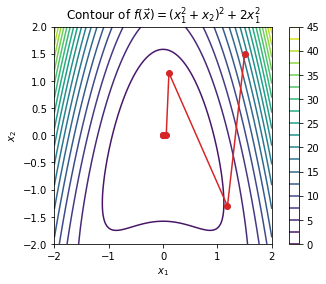

In [6]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

N = 100
p_min = -2
p_max = 2
x1_i = np.linspace(p_min, p_max, N)
x2_i = np.linspace(p_min, p_max, N)
x1, x2 = np.meshgrid(x1_i, x2_i)

f = (x1**2 + x2)**2 + 2*x1**2

plt.contour(x1, x2, f, 20)
plt.plot(X[:,0], X[:,1], "C3o-")

plt.colorbar()
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.title(r"Contour of $f(\vec{x}) = (x_1^2 + x_2)^2 + 2x_1^2$")
plt.axes().set_aspect("equal")

## Homework
### Question 1
Minimise
$$
f(\vec{x}) = \log (x_1^2 + x_2^2) - 2x_1
$$
starting at
$$
x^{(0)} = \begin{pmatrix}1/2\\1/2 \end{pmatrix}
$$

Solution
$$
\nabla f(\vec{x}) = g(\vec{x}) = \begin{pmatrix} \frac{2x_1}{x_1^2 + x_2^2} - 2\\\frac{2x_2}{x_1^2 + x_2^2} \end{pmatrix}
$$
Hessian
$$
F(\vec{x}) = \begin{pmatrix} \frac{2}{x_1^2 + x_2^2} - \frac{4x_1^2}{(x_1^2 + x_2^2)^2} & -\frac{4x_1x_2}{(x_1^2 + x_2^2)^2} \\ -\frac{4x_1x_2}{(x_1^2 + x_2^2)^2} & \frac{2}{x_1^2 + x_2^2} - \frac{4x_2^2}{(x_1^2 + x_2^2)^2} \end{pmatrix}
$$

iter: 1, x^(1) = [1.  0.5], g^(0) = [0. 2.], F^-1 = [[-0.   -0.25]
 [-0.25 -0.  ]] f(x) = -1.7769, norm(grad_f) = 0.8944
iter: 2, x^(2) = [1.25 0.  ], g^(1) = [-0.4  0.8], F^-1 = [[-0.375 -0.5  ]
 [-0.5    0.375]] f(x) = -2.0537, norm(grad_f) = 0.4000
iter: 3, x^(3) = [0.9375 0.    ], g^(2) = [-0.4  0. ], F^-1 = [[-0.78125 -0.     ]
 [ 0.       0.78125]] f(x) = -2.0041, norm(grad_f) = 0.1333
iter: 4, x^(4) = [0.99609375 0.        ], g^(3) = [0.13333333 0.        ], F^-1 = [[-0.43945312 -0.        ]
 [ 0.          0.43945312]] f(x) = -2.0000, norm(grad_f) = 0.0078
iter: 5, x^(5) = [0.99998474 0.        ], g^(4) = [0.00784314 0.        ], F^-1 = [[-0.49610138 -0.        ]
 [ 0.          0.49610138]] f(x) = -2.0000, norm(grad_f) = 0.0000
iter: 6, x^(6) = [1. 0.], g^(5) = [3.05180438e-05 0.00000000e+00], F^-1 = [[-0.49998474 -0.        ]
 [ 0.          0.49998474]] f(x) = -2.0000, norm(grad_f) = 0.0000
iter: 7, x^(7) = [1. 0.], g^(6) = [4.65661287e-10 0.00000000e+00], F^-1 = [[-0.5 -0. ]
 

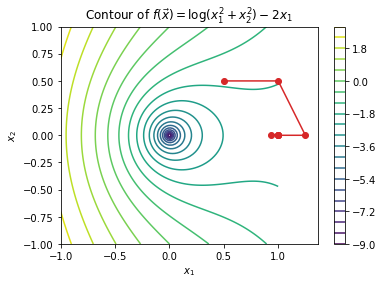

In [7]:
def f(x):
    x1 = x[0]
    x2 = x[1]
    ans = np.log(x1**2 + x2**2) - 2*x1
    return ans

def get_grad_f(x):
    grad_f = np.zeros(len(x))
    x1 = x[0]
    x2 = x[1]
    grad_f[0] = 2*x1/(x1**2 + x2**2) - 2
    grad_f[1] = 2*x2/(x1**2 + x2**2)
    return grad_f

def get_F(x):
    x1 = x[0]
    x2 = x[1]
    f_11 = 2/(x1**2 + x2**2) - 4*x1**2/((x1**2 + x2**2)**2)
    f_12 = -4*x1*x2/((x1**2 + x2**2)**2)
    f_22 = 2/(x1**2 + x2**2) - 4*x2**2/((x1**2 + x2**2)**2)
    return np.array([[f_11, f_12], [f_12, f_22]])

x_0 = np.array([0.5, 0.5])

X, G = newton(f, get_grad_f, get_F, x_0, 1e-10)


N = 100
p_min = -1
p_max = 1
x1_i = np.linspace(p_min, p_max, N)
x2_i = np.linspace(p_min, p_max, N)
x1, x2 = np.meshgrid(x1_i, x2_i)

f = np.log(x1**2 + x2**2) - 2*x1

plt.contour(x1, x2, f, 20)
plt.plot(X[:,0], X[:,1], "C3o-")

plt.colorbar()
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.title(r"Contour of $f(\vec{x}) = \log (x_1^2 + x_2^2) - 2x_1$")
plt.axes().set_aspect("equal")

Now starting at 
$$
x^{(0)} = \begin{pmatrix}1\\1 \end{pmatrix}
$$


iter: 1, x^(1) = [2. 0.], g^(0) = [-1.  1.], F^-1 = [[-0. -1.]
 [-1. -0.]] f(x) = -2.6137, norm(grad_f) = 1.0000
iter: 2, x^(2) = [0. 0.], g^(1) = [-1.  0.], F^-1 = [[-2. -0.]
 [ 0.  2.]] f(x) = -inf, norm(grad_f) = nan


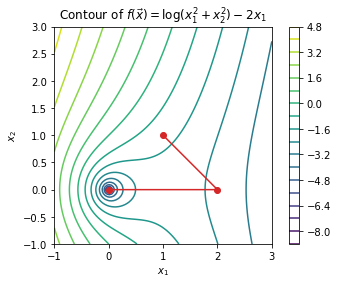

In [8]:
def f(x):
    x1 = x[0]
    x2 = x[1]
    ans = np.log(x1**2 + x2**2) - 2*x1
    return ans

def get_grad_f(x):
    grad_f = np.zeros(len(x))
    x1 = x[0]
    x2 = x[1]
    grad_f[0] = 2*x1/(x1**2 + x2**2) - 2
    grad_f[1] = 2*x2/(x1**2 + x2**2)
    return grad_f

def get_F(x):
    x1 = x[0]
    x2 = x[1]
    f_11 = 2/(x1**2 + x2**2) - 4*x1**2/((x1**2 + x2**2)**2)
    f_12 = -4*x1*x2/((x1**2 + x2**2)**2)
    f_22 = 2/(x1**2 + x2**2) - 4*x2**2/((x1**2 + x2**2)**2)
    return np.array([[f_11, f_12], [f_12, f_22]])

x_0 = np.array([1, 1])

X, G = newton(f, get_grad_f, get_F, x_0, 1e-10)


N = 100
p_min = -1
p_max = 3
x1_i = np.linspace(p_min, p_max, N)
x2_i = np.linspace(p_min, p_max, N)
x1, x2 = np.meshgrid(x1_i, x2_i)

f = np.log(x1**2 + x2**2) - 2*x1

plt.contour(x1, x2, f, 20)
plt.plot(X[:,0], X[:,1], "C3o-")

plt.colorbar()
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.title(r"Contour of $f(\vec{x}) = \log (x_1^2 + x_2^2) - 2x_1$")
plt.axes().set_aspect("equal")

### Question 3
Minimise
$$
f(\vec{x}) = \frac{1}{2}\sin (2x_1) + x_1x_2 + e^{x_2^2}
$$
starting at
$$
x^{(0)} = \begin{pmatrix} 0 \\0 \end{pmatrix}
$$

Solution
$$
\nabla f(\vec{x}) = g(\vec{x}) = \begin{pmatrix} \cos (2x_1) + x_2\\x_1 + 2e^{x_2^2}x_2 \end{pmatrix}
$$
Hessian
$$
F(\vec{x}) = \begin{pmatrix} -2\sin (2x_1) & 1 \\ 1 & 4e^{x_2^2}x_2^2 + 2e^{x_2^2} \end{pmatrix}
$$

iter: 1, x^(1) = [1.10064672 0.59918245], g^(0) = [0.58385316 6.43656366], F^-1 = [[-0.5319409   0.03261502]
 [ 0.03261502  0.05931351]] f(x) = 2.4953, norm(grad_f) = 2.8166
iter: 2, x^(2) = [0.79118457 0.08961984], g^(1) = [0.00963608 2.81661524], F^-1 = [[-0.54983949  0.11175131]
 [ 0.11175131  0.18053079]] f(x) = 1.5789, norm(grad_f) = 0.9750
iter: 3, x^(3) = [ 0.63186969 -0.30703586], g^(2) = [0.07804728 0.97186966], F^-1 = [[-0.40192526  0.19620332]
 [ 0.19620332  0.39238036]] f(x) = 1.3815, norm(grad_f) = 0.0432
iter: 4, x^(4) = [ 0.63695656 -0.29255667], g^(3) = [-0.00478132 -0.04290763], F^-1 = [[-0.43681634  0.16722952]
 [ 0.16722952  0.31881548]] f(x) = 1.3811, norm(grad_f) = 0.0004
iter: 5, x^(5) = [ 0.63702499 -0.29241031], g^(4) = [-1.54749643e-05 -4.41883977e-04], F^-1 = [[-0.43395125  0.1700657 ]
 [ 0.1700657   0.32525165]] f(x) = 1.3811, norm(grad_f) = 0.0000
iter: 6, x^(6) = [ 0.637025  -0.2924103], g^(5) = [-2.73965062e-09 -4.32868239e-08], F^-1 = [[-0.43391906  0.170

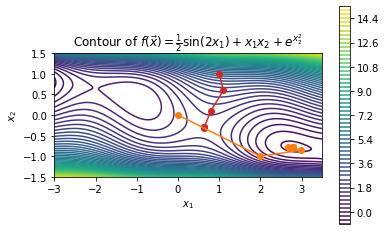

In [9]:
def f(x):
    x1 = x[0]
    x2 = x[1]
    ans = 1/2*np.sin(2*x1) + x1*x2 + np.exp(x2**2)
    return ans

def get_grad_f(x):
    grad_f = np.zeros(len(x))
    x1 = x[0]
    x2 = x[1]
    grad_f[0] = np.cos(2*x1) + x2
    grad_f[1] = x1 + 2*np.exp(x2**2)*x2
    return grad_f

def get_F(x):
    x1 = x[0]
    x2 = x[1]
    f_11 = -2*np.sin(2*x1)
    f_12 = 1
    f_22 = 4*np.exp(x2**2)*x2**2 + 2*np.exp(x2**2)
    return np.array([[f_11, f_12], [f_12, f_22]])

x_0 = np.array([1, 1])

X, G = newton(f, get_grad_f, get_F, x_0, 1e-10)

x_0 = np.array([0, 0])

Y, G = newton(f, get_grad_f, get_F, x_0, 1e-10)


N = 100
p_min = -3
p_max = 3
x1_i = np.linspace(-3, 3.5, N)
x2_i = np.linspace(-1.5, 1.5, N)
x1, x2 = np.meshgrid(x1_i, x2_i)

f = 1/2*np.sin(2*x1) + x1*x2 + np.exp(x2**2)

plt.contour(x1, x2, f, 60)
plt.plot(X[:,0], X[:,1], "C3o-")
plt.plot(Y[:,0], Y[:,1], "C1o-")


plt.colorbar()
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.title(r"Contour of $f(\vec{x}) = \frac{1}{2}\sin (2x_1) + x_1x_2 + e^{x_2^2}$")
plt.axes().set_aspect("equal")

### Question 4
Minimise
$$
f(\vec{x}) = \sin x + x^2
$$

Solution
$$
f'(x) = 2x + \cos(x)
$$
and
$$
f''(x) = 2 - \sin(x)
$$

In [10]:
def f(x):
    return np.sin(x) + x**2

def f_prime(x):
    return 2*x + np.cos(x)

def f_prime_2(x):
    return 2 - np.sin(x)

X = newton_1var(f, f_prime, f_prime_2, 0.5, 1e-8)

iter: 1, x^(1) = -0.7348, f(x) = -0.1305, f'(x) = -0.7276
iter: 2, x^(2) = -0.4623, f(x) = -0.2323, f'(x) = -0.0296
iter: 3, x^(3) = -0.4502, f(x) = -0.2325, f'(x) = -0.0001
iter: 4, x^(4) = -0.4502, f(x) = -0.2325, f'(x) = -0.0000
